# 데이터 불러오기 및 데이터 스케일링

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    
kream = pd.read_csv('df_filtered.csv', encoding = 'cp949')
kream

,상품명,거래량,최근거래가,발매일,발매일로부터현재까지일,발매가,색상개수,최고거래가,최고거래성사일,최저거래가,...,브랜드_Adidas,브랜드_Asics,브랜드_Converse,브랜드_Jordan,브랜드_Mihara Yasuhiro,브랜드_New Balance,브랜드_Nike,브랜드_Puma,브랜드_Salomon,브랜드_Vans
0,나이키 V2K 런 라이트 오어우드 브라운 카키,4.748321,3.427711,2024-01-04,12.402237,3.959586,4,2.869657,2024-05-10,3.734096,...,0,0,0,0,0,0,1,0,0,0
1,나이키 에어 줌 알파플라이 넥스트% 3 볼트,4.753022,3.471594,2024-02-15,10.657562,4.006456,4,2.885397,2024-02-15,3.800698,...,0,0,0,0,0,0,1,0,0,0
2,(W) 나이키 에어포스 1 '07 WB 플랙스 위트,4.535706,3.445503,2023-12-18,13.006454,3.969553,3,2.876575,2024-03-18,3.746308,...,0,0,0,0,0,0,1,0,0,0
3,(W) 나이키 코르테즈 SE 밸런타인데이 세일 어도비,4.742146,3.432313,2024-02-14,10.704532,3.955055,4,2.869657,2024-02-02,3.727202,...,0,0,0,0,0,0,1,0,0,0
4,나이키 V2K 런 화이트 퍼,4.735441,3.433910,2023-09-08,15.900007,3.959586,4,2.870449,2024-02-22,3.712485,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,나이키 에어포스 1 '07 LV8 화이트 블랙 울프 그레이,4.290478,3.459225,2021-11-27,25.740766,3.942443,4,2.879860,2023-06-15,3.750450,...,0,0,0,0,0,0,1,0,0,0
1717,나이키 에어포스 1 '07 LV8 넥스트 네이쳐 라탄 세일 브라운 켈프,3.338150,3.445911,2021-11-05,25.969419,3.968846,2,2.870449,2021-12-20,3.720837,...,0,0,0,0,0,0,1,0,0,0
1718,나이키 블레이저 미드 '77 점보 다크 러셋,2.754610,3.428090,2021-11-04,25.979726,3.955055,2,2.870449,2021-12-02,3.716376,...,0,0,0,0,0,0,1,0,0,0
1719,(W) 나이키 블레이저 미드 '77 LX 화이트 펜던트,2.689813,3.436583,2021-11-04,25.979726,3.959586,2,2.870525,2021-11-01,3.734731,...,0,0,0,0,0,0,1,0,0,0


In [4]:
kream_1 = kream[['수익률', '거래량', '가격변동성']]	#필요한 데이터 분리
print(kream_1)

            수익률       거래량       가격변동성
0     16.369253  4.748321  549.924666
1     34.619743  4.753022  421.307319
2     31.049965  4.535706  748.701225
3     19.775355  4.742146  644.740906
4     18.723327  4.735441  853.630261
...         ...       ...         ...
1716  71.567841  4.290478  870.972815
1717  11.500285  3.338150  761.553027
1718  22.134356  2.754610  812.235411
1719  18.948917  2.689813  586.101180
1720  18.996439  3.723108  855.295509

[1721 rows x 3 columns]


In [5]:
kream_1 = kream_1.rename(columns = {'수익률': 'rate', '거래량': 'volume', '가격변동성': 'variability'})    #열이름 변경
print(kream_1)

           rate    volume  variability
0     16.369253  4.748321   549.924666
1     34.619743  4.753022   421.307319
2     31.049965  4.535706   748.701225
3     19.775355  4.742146   644.740906
4     18.723327  4.735441   853.630261
...         ...       ...          ...
1716  71.567841  4.290478   870.972815
1717  11.500285  3.338150   761.553027
1718  22.134356  2.754610   812.235411
1719  18.948917  2.689813   586.101180
1720  18.996439  3.723108   855.295509

[1721 rows x 3 columns]


In [6]:
print("max\n", kream_1.max())
print("min\n", kream_1.min())

max
 rate            102.616755
volume            5.263811
variability    1234.283256
dtype: float64
min
 rate           -45.728531
volume           2.052011
variability    232.880173
dtype: float64


In [7]:
from sklearn.preprocessing import StandardScaler # 스케일링

scaler = StandardScaler()
kream_1_scaled = scaler.fit_transform(kream_1)
print(kream_1_scaled)

[[-0.33447903  1.44678202 -0.8724063 ]
 [ 0.47077539  1.45274574 -1.46026883]
 [ 0.31326842  1.17704855  0.03612815]
 ...
 [-0.08010916 -1.08253079  0.32651952]
 [-0.22065819 -1.16473615 -0.70705678]
 [-0.21856143  0.14614975  0.52333137]]


## 조건이 '수익률', '거래량', '변동성' 일 때
### AgglomerativeClustering

In [8]:
from sklearn.cluster import AgglomerativeClustering

### 그래프 그리기

In [9]:
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] =False

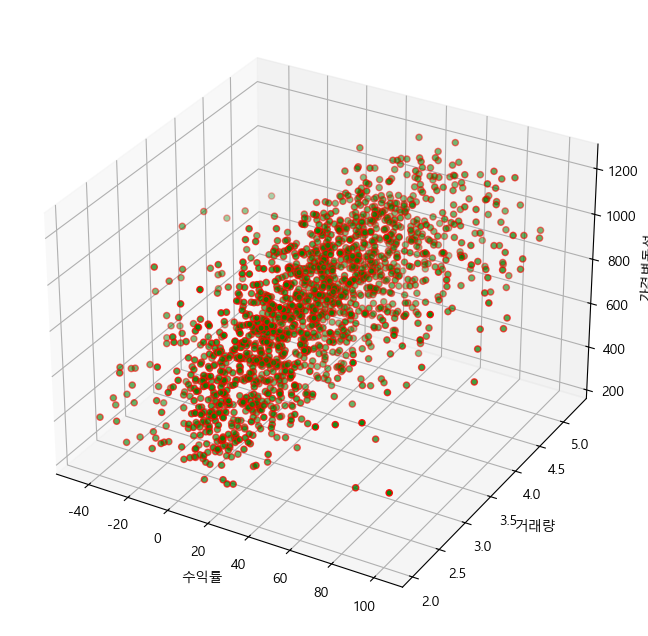

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = '3d')

x = kream_1['rate']
y = kream_1['volume']
z = kream_1['variability']

ax.scatter(x, y, z, c = 'g', edgecolors = 'red')
ax.set_xlabel('수익률')
ax.set_ylabel('거래량')
ax.set_zlabel('가격변동성')

plt.show()

### AgglomerativeClustering

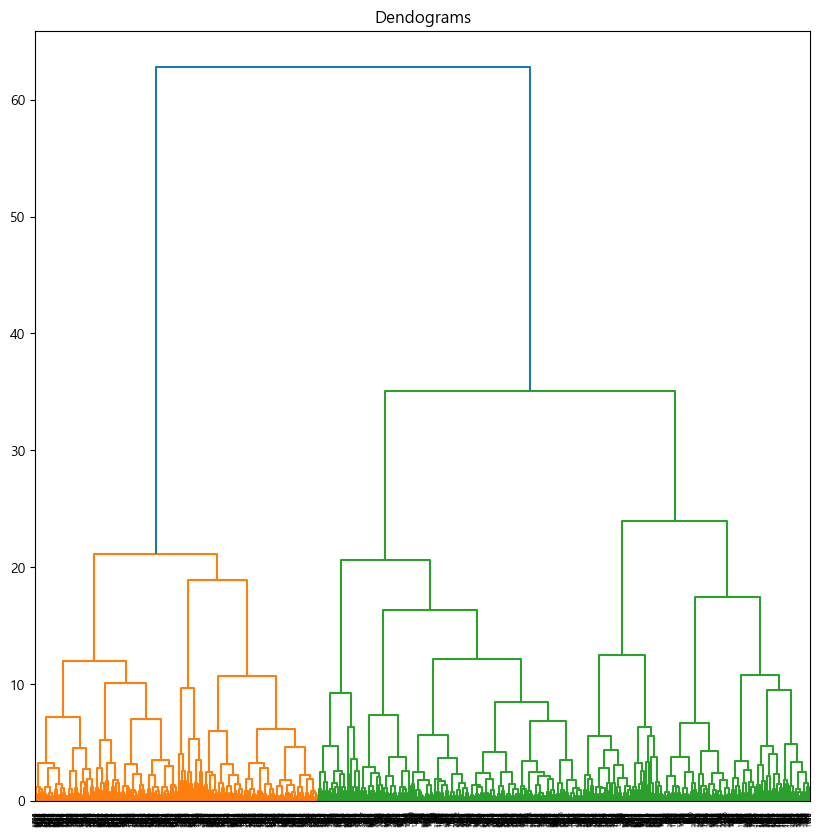

In [14]:
import scipy.cluster.hierarchy as shc

# data transformation
data = pd.DataFrame(kream_1_scaled).values
# display(data)

# dendrogram 그리기
plt.figure(figsize=(10, 10))
plt.title("Dendograms")

link = shc.linkage(data, method='ward')
# meathod = 
# "complete" : 클러스터의 가장 멀리있는 점과의 거리가 가장 작은것에 포함시키는 방법
# "single"   : 클러스터의 가장 가까이 있는 점과의 거리가 가장 작은것에 포함시키는 방법
# "average"  : 클러스터의 모든 점과의 평균이 가장 작은것에 포함시키는 방법

dend = shc.dendrogram(link)

In [33]:
nc_settings = [2, 3, 4, 5]
linkage_settings = ['ward', 'complete', 'average', 'single']

for nc in nc_settings:
    for link in linkage_settings:
        aggl = AgglomerativeClustering(n_clusters = nc, linkage = link)
        aggl.fit(kream_1_scaled)

        kream_1_agg = aggl.labels_
        print("n_clusters = ", nc, "linkage = ", link)
        print(pd.DataFrame(kream_1_agg).value_counts(sort = False))

n_clusters =  2 linkage =  ward
0    1092
1     629
Name: count, dtype: int64
n_clusters =  2 linkage =  complete
0     572
1    1149
Name: count, dtype: int64
n_clusters =  2 linkage =  average
0    1715
1       6
Name: count, dtype: int64
n_clusters =  2 linkage =  single
0    1720
1       1
Name: count, dtype: int64
n_clusters =  3 linkage =  ward
0    502
1    629
2    590
Name: count, dtype: int64
n_clusters =  3 linkage =  complete
0    1149
1     543
2      29
Name: count, dtype: int64
n_clusters =  3 linkage =  average
0    1622
1       6
2      93
Name: count, dtype: int64
n_clusters =  3 linkage =  single
0    1719
1       1
2       1
Name: count, dtype: int64
n_clusters =  4 linkage =  ward
0    629
1    325
2    590
3    177
Name: count, dtype: int64
n_clusters =  4 linkage =  complete
0    732
1    543
2     29
3    417
Name: count, dtype: int64
n_clusters =  4 linkage =  average
0     545
1    1077
2      93
3       6
Name: count, dtype: int64
n_clusters =  4 linkage =  s

#### n_clusters =  5, linkage =  'ward' 일 때, 적당하다고 판단 

In [34]:
agg = AgglomerativeClustering(n_clusters =  5, linkage =  'ward')
agg.fit(kream_1_scaled)

AgglomerativeClustering(n_clusters=5)

In [35]:
kream_1_agg = agg.labels_
print(pd.DataFrame(kream_1_agg))

      0
0     0
1     0
2     0
3     0
4     0
...  ..
1716  1
1717  2
1718  2
1719  2
1720  0

[1721 rows x 1 columns]


In [36]:
kream_1_agg = pd.DataFrame(kream_1_agg)
kream_1_agg.value_counts()  # 클러스터별 개수 확인

0    590
1    325
4    318
2    311
3    177
Name: count, dtype: int64

In [37]:
kream_1.insert(3, 'agg', kream_1_agg)
kream_1_clustered = kream_1  # 클러스터 라벨링

In [38]:
kream_1_clustered

,rate,volume,variability,agg
0,16.369253,4.748321,549.924666,0
1,34.619743,4.753022,421.307319,0
2,31.049965,4.535706,748.701225,0
3,19.775355,4.742146,644.740906,0
4,18.723327,4.735441,853.630261,0
...,...,...,...,...
1716,71.567841,4.290478,870.972815,1
1717,11.500285,3.338150,761.553027,2
1718,22.134356,2.754610,812.235411,2
1719,18.948917,2.689813,586.101180,2


### 그래프 그리기

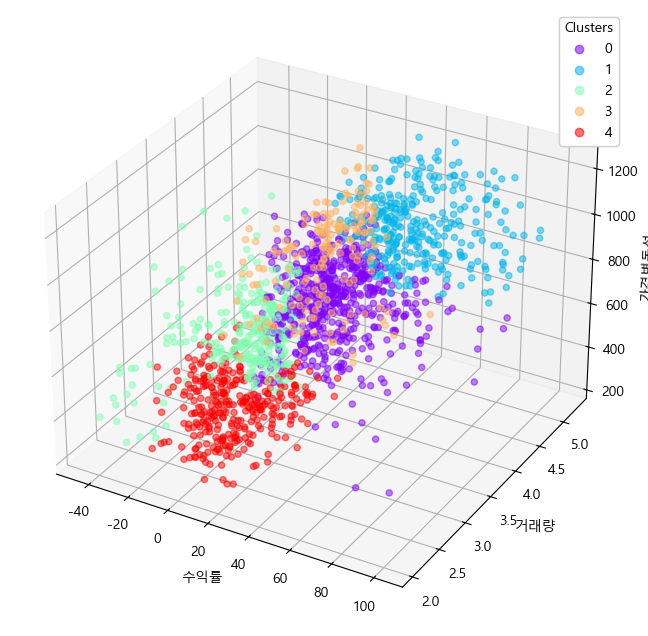

In [39]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = '3d')

x = kream_1_clustered['rate']
y = kream_1_clustered['volume']
z = kream_1_clustered['variability']

scatter = ax.scatter(x, y, z, c = kream_1_clustered['agg'], cmap = "rainbow", alpha = 0.5)
ax.set_xlabel('수익률')
ax.set_ylabel('거래량')
ax.set_zlabel('가격변동성')

legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.show()

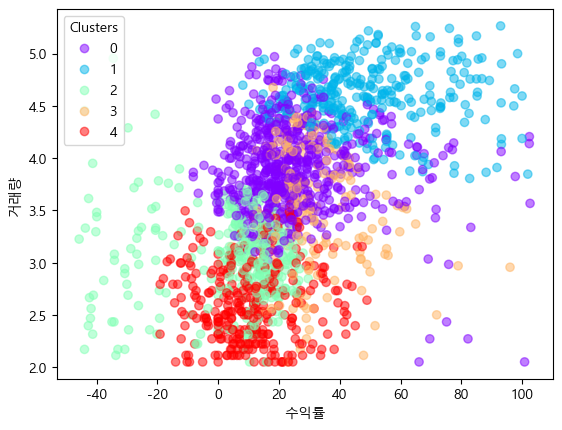

In [40]:
plt.scatter(kream_1_clustered['rate'], kream_1_clustered['volume'], c = kream_1_clustered['agg'], cmap = "rainbow", alpha = 0.5)
plt.xlabel('수익률')
plt.ylabel('거래량')
plt.legend(*scatter.legend_elements(), title="Clusters")

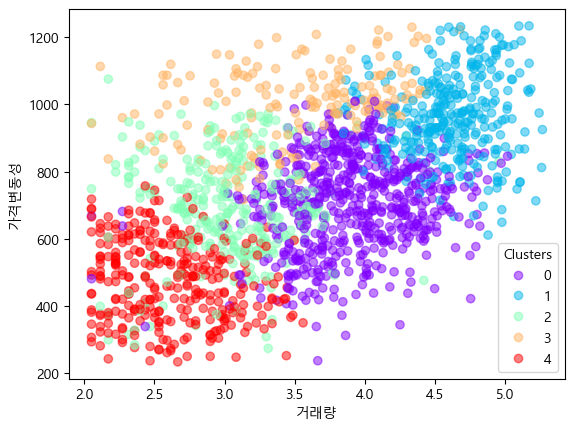

In [41]:
plt.scatter(kream_1_clustered['volume'], kream_1_clustered['variability'], c = kream_1_clustered['agg'], cmap = "rainbow", alpha = 0.5)
plt.xlabel('거래량')
plt.ylabel('가격변동성')
plt.legend(*scatter.legend_elements(), title="Clusters")

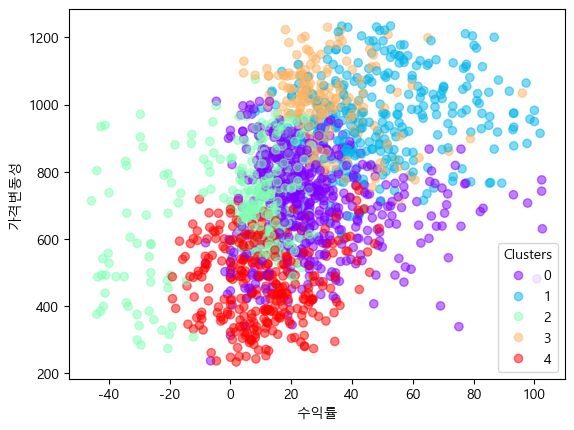

In [42]:
plt.scatter(kream_1_clustered['rate'], kream_1_clustered['variability'], c = kream_1_clustered['agg'], cmap = "rainbow", alpha = 0.5)
plt.xlabel('수익률')
plt.ylabel('가격변동성')
plt.legend(*scatter.legend_elements(), title="Clusters")

### 결과와 관련된 통계량

In [43]:
print("평균값\n", kream_1_clustered[['rate', 'volume', 'variability', 'agg']].groupby('agg').mean())
print("\n표준편차\n", kream_1_clustered[['rate', 'volume', 'variability', 'agg']].groupby('agg').std())
print("\n중앙값\n", kream_1_clustered[['rate', 'volume', 'variability', 'agg']].groupby('agg').median())
print("\n최대값\n", kream_1_clustered[['rate', 'volume', 'variability', 'agg']].groupby('agg').max())
print("\n최소값\n", kream_1_clustered[['rate', 'volume', 'variability', 'agg']].groupby('agg').min())

평균값
           rate    volume  variability
agg                                  
0    25.372525  3.902571   707.308089
1    48.613468  4.613414   962.703177
2     4.469672  3.052088   697.336344
3    31.795319  3.522485  1001.399627
4    10.788972  2.624692   473.590176

표준편차
           rate    volume  variability
agg                                  
0    17.397324  0.413488   140.153136
1    19.963836  0.299997   125.582953
2    18.057804  0.421430   150.922080
3    13.306551  0.569403   112.394223
4    13.927381  0.367093   118.332009

중앙값
           rate    volume  variability
agg                                  
0    21.879234  3.889016   719.004071
1    44.920329  4.615377   956.793085
2    10.217985  3.059169   694.766870
3    29.115358  3.571509  1011.092215
4    10.037609  2.589984   481.622624

최대값
            rate    volume  variability
agg                                   
0    102.616755  5.015248  1009.753028
1    101.868871  5.263811  1234.283256
2     29.642838  4.954

## 클러스터별 상품

In [52]:
cluster_0 = kream_1_clustered.query('agg == 0')
print(cluster_0.query('21 < rate < 27 & 3 < volume < 5 & 706 < variability < 720'), '\n')
index_0 = cluster_0.query('21 < rate < 27 & 3 < volume < 5 & 706 < variability < 720').index
print(kream.iloc[index_0, 0])

          rate    volume  variability  agg
459  26.263129  4.278586   708.574337    0
558  26.026748  3.621799   706.457549    0
713  24.297802  3.510426   712.429791    0
907  21.003282  3.676926   719.391530    0 

459    나이키 에어포스 1 로우 레트로 QS 웨스트 인디스 클래식 그린
558    나이키 SB 덩크 로우 프로 프리미엄 오렌지 앤 에메랄드 라이즈
713                  나이키 에어포스 1 로우 고어텍스 블랙
907          (W) 나이키 에어맥스 스콜피온 플라이니트 레몬 워시
Name: 상품명, dtype: object


In [63]:
cluster_1 = kream_1_clustered.query('agg == 0')
print(cluster_1.query('40 < rate < 52 & 3 < volume < 7 & 820 < variability < 860'), '\n')
index_1 = cluster_1.query('40 < rate < 52 & 3 < volume < 7 & 820 < variability < 860').index
print(kream.iloc[index_1, 0])

           rate    volume  variability  agg
805   43.455321  3.908519   821.223712    0
1009  42.732039  3.912313   855.295509    0
1510  46.214217  3.912313   820.404893    0 

805                    나이키 에어맥스 2 CB 94 블랙 앤 퓨어 퍼플
1009                      나이키 SB 덩크 하이 프로 QS 패스~포트
1510    (PS) 나이키 x 스투시 에어포스 1 '07 미드 SP 블랙 앤 라이트 본
Name: 상품명, dtype: object


In [65]:
cluster_2 = kream_1_clustered.query('agg == 2')
print(cluster_2.query('5 < rate < 9 & 2.5 < volume < 3.5 & 690 < variability < 710'), '\n')
index_2 = cluster_2.query('5 < rate < 9 & 2.5 < volume < 3.5 & 690 < variability < 710').index
print(kream.iloc[index_2, 0])

          rate    volume  variability  agg
290   7.794728  2.774643   697.634100    2
574   6.979399  3.324605   702.807488    2
1600  7.651322  3.059169   694.766870    2 

290           나이키 ACG 워터캣+ 비비드 설퍼
574       나이키 덩크 로우 레트로 팬텀 샌드드리프트
1600    (W) 나이키 에어맥스 95 라이즈 앤 유니티
Name: 상품명, dtype: object


In [76]:
cluster_3 = kream_1_clustered.query('agg == 3')
print(cluster_3.query('29 < rate < 31 & 3 < volume < 4 & 962 < variability < 1050'), '\n')
index_3 = cluster_3.query('29 < rate < 31 & 3 < volume < 4 & 962 < variability < 1050').index
print(kream.iloc[index_3, 0])

           rate    volume  variability  agg
571   29.809022  3.759582   991.746367    3
1118  29.176523  3.618121   992.410875    3
1562  30.263416  3.505741   974.534256    3 

571     나이키 x 스투시 반달 하이 딥 로얄 블루
1118    나이키 에어맥스 96 II 미드나잇 네이비
1562           나이키 ACG 목 3.5 블랙
Name: 상품명, dtype: object


In [79]:
cluster_4 = kream_1_clustered.query('agg == 4')
print(cluster_4.query('9 < rate < 12 & 2 < volume < 4 & 454 < variability < 500'), '\n')
index_4 = cluster_4.query('9 < rate < 12 & 2 < volume < 4 & 454 < variability < 500').index
print(kream.iloc[index_4, 0])

           rate    volume  variability  agg
547   11.669614  2.589984   458.410053    4
834    9.410294  2.774643   486.551382    4
882    9.036795  2.224329   491.667551    4
1467  11.465532  2.272615   491.667551    4 

547      (W) 나이키 에어 풋스케이프 우븐 세일 앤 블랙
834               나이키 와플 원 내츄럴 라이트 본
882             나이키 프리미어 3 FG 블랙 화이트
1467    (W) 나이키 에어포스 1 '07 SE 자카드 세일
Name: 상품명, dtype: object
